# Build NN

## 1. Prepare datasets

In [1]:
# connect google drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import random
import torch
import torchvision
from torchvision import transforms, datasets
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
root='/content/drive/My Drive/Colab Notebooks/Data/MNIST'

In [3]:
train_val = datasets.MNIST(root, train=True, download=False,
                      transform=transforms.Compose([
                        transforms.RandomRotation(10),
                        transforms.ToTensor()
                        ]))
test = datasets.MNIST(root, train=False, download=False,
                      transform=transforms.Compose([
                        transforms.RandomRotation(10),
                        transforms.ToTensor()
                        ]))

In [4]:
lengths = [50000,10000]
train_btch_size=10
val_btch_size=10
tst_btch_size=10
generator = torch.Generator().manual_seed(3)
train,val = torch.utils.data.random_split(train_val,lengths,generator=generator)
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
valset = torch.utils.data.DataLoader(val, batch_size=10, shuffle=False)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

## 2. Build simple neural network

Import torch.nn for building module.Import torch.nn.functional for funcitons we will use.

Question：
1. How many layers is better?
2. Parallel or Pyramid?
3. Why last layer don't have activate funciton?
4. What is log_softmax?

In [5]:
# 1024,512,10
class Net3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

In [6]:
# 1536,1024,512,10
class Net4(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 1536)
        self.fc2 = nn.Linear(1536, 1024)
        self.fc3 = nn.Linear(1024, 512)
        self.fc4 = nn.Linear(512, 10)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

In [7]:
# 2048, 1536, 1024, 512,10
class Net5(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 2048)
        self.fc2 = nn.Linear(2048, 1536)
        self.fc3 = nn.Linear(1536, 1024)
        self.fc4 = nn.Linear(1024, 512)
        self.fc5 = nn.Linear(512, 10)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim=1)

In [8]:
# 2560,2048,1536,1024,512,10
class Net6(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 2560)
        self.fc2 = nn.Linear(2560, 2048)
        self.fc3 = nn.Linear(2048, 1536)
        self.fc4 = nn.Linear(1536, 1024)
        self.fc5 = nn.Linear(1024, 512)
        self.fc6 = nn.Linear(512, 10)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return F.log_softmax(x, dim=1)

## 3. Push random Input

Give random image size input to see the result.

In [9]:
# X = torch.rand((28,28))
# X = X.view(-1,28*28) #any size
# output = net(X)
# output

## 4. Optimizer

> net.parameters() -> What can be modified.<br/>
> lr -> Learning Rate

GPU


In [10]:
# networks: Net3, Net4, Net5, Net6
net = Net5()
use_gpu = torch.cuda.is_available()

if use_gpu:
  net.cuda()
  # get gpu information
  device_id = torch.cuda.current_device()
  device_num = torch.cuda.device_count()
  device_name = torch.cuda.get_device_name(device_id)
  print("GPU available")
  print("Device name:",device_name)
  print("Device number:",device_num)

# optimizer
optimizer = torch.optim.Adam(net.parameters(),lr=0.001)

# epoch
EPOCHS = 30

# learning rate decrease (epoch>5)
# lr_lambda = lambda epoch: 1 if epoch<5 else 0.9**(epoch-5)
# scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lr_lambda)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer,0.9)
print(net)

GPU available
Device name: Tesla P4
Device number: 1
Net5(
  (fc1): Linear(in_features=784, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=1536, bias=True)
  (fc3): Linear(in_features=1536, out_features=1024, bias=True)
  (fc4): Linear(in_features=1024, out_features=512, bias=True)
  (fc5): Linear(in_features=512, out_features=10, bias=True)
)


In [11]:
%%time
random.seed(3)
torch.manual_seed(3)

losses = {'train':[],'val':[]}
corrects = {'train':[],'val':[]}

for epoch in range(EPOCHS):
  trn_corr = 0
  val_corr = 0
  trn_loss = 0
  val_loss = 0
  for batch, data in enumerate(trainset):
      # data is a batch of featuresets and labels
      # batch stands for batch number
      batch+=1
      X, y = data
      if use_gpu:
        X = Variable(X).cuda()
        y = Variable(y).cuda()
      net.zero_grad()
      output = net(X.view(-1,28*28))
      loss = F.nll_loss(output,y)
      predicted =torch.max(output.data,1)[1]
      loss.backward()
      optimizer.step() # adjust data

      trn_loss += loss.item()*X.size(0)
      trn_corr += (predicted == y).sum()

      if batch%100 ==0:
            print(f'epoch:{epoch} batch:{batch} loss:{loss.item()} accuracy:{trn_corr.item()/(batch*train_btch_size)*100}')
  scheduler.step()
  losses['train'].append(trn_loss/len(train))
  corrects['train'].append(trn_corr.item()/len(train)*100)

  with torch.no_grad():
    for batch_val, data_val in enumerate(valset):
      X_val,y_val = data_val
      if use_gpu:
        X_val = Variable(X_val).cuda()
        y_val = Variable(y_val).cuda()
      output_val = net(X_val.view(-1,28*28))
      predicted_val = torch.max(output_val.data,1)[1]
      loss = F.nll_loss(output_val,y_val)
      val_corr += (predicted_val==y_val).sum()
      val_loss += loss.item()*X_val.size(0)
    
    losses['val'].append(val_loss/len(val))
    corrects['val'].append(val_corr.item()/len(val)*100)

  

epoch:0 batch:100 loss:0.5978085994720459 accuracy:44.6
epoch:0 batch:200 loss:0.8271945118904114 accuracy:57.45
epoch:0 batch:300 loss:0.829644501209259 accuracy:64.86666666666666
epoch:0 batch:400 loss:0.5501216650009155 accuracy:69.65
epoch:0 batch:500 loss:0.10246570408344269 accuracy:72.74000000000001
epoch:0 batch:600 loss:1.1603240966796875 accuracy:75.31666666666666
epoch:0 batch:700 loss:0.07118973135948181 accuracy:77.22857142857143
epoch:0 batch:800 loss:0.42594414949417114 accuracy:78.5125
epoch:0 batch:900 loss:0.18157361447811127 accuracy:79.46666666666667
epoch:0 batch:1000 loss:0.22258548438549042 accuracy:80.5
epoch:0 batch:1100 loss:0.14931344985961914 accuracy:81.38181818181818
epoch:0 batch:1200 loss:0.3378119468688965 accuracy:82.075
epoch:0 batch:1300 loss:0.17977288365364075 accuracy:82.73076923076923
epoch:0 batch:1400 loss:0.19266188144683838 accuracy:83.35714285714285
epoch:0 batch:1500 loss:0.26679086685180664 accuracy:83.88666666666667
epoch:0 batch:1600 los

## Plot training process
1. Plot train and val loss changes
2. Plot train and val accuracy changes

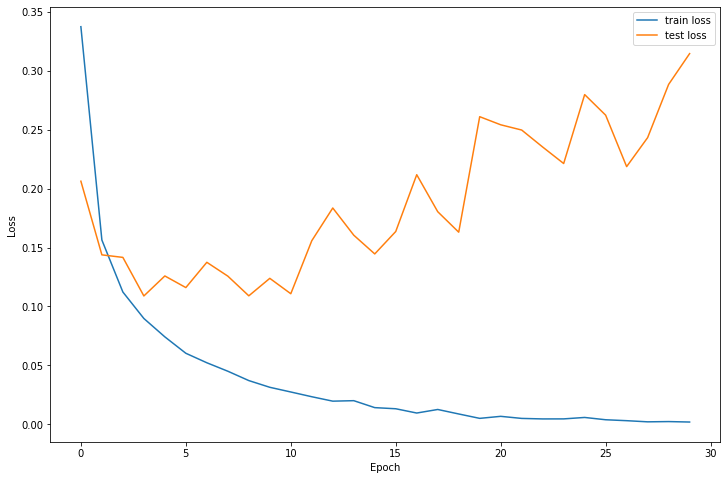

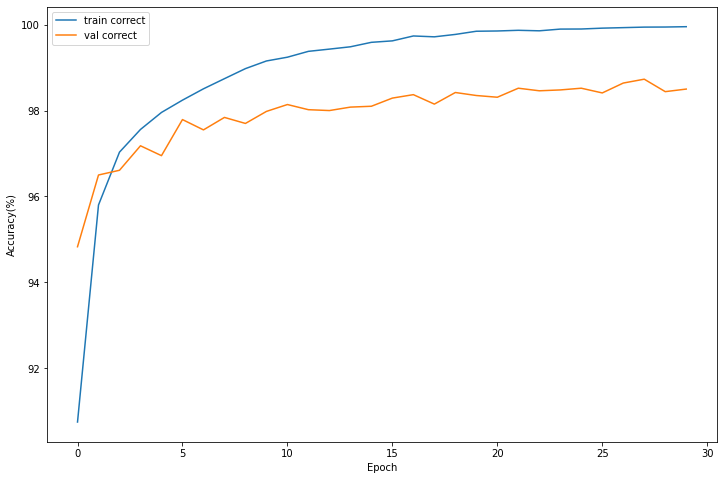

In [12]:
#  Plot train loss and val loss 
plt.figure(figsize=(12,8))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(losses['train'],label = 'train loss')
plt.plot(losses['val'],label  = 'test loss')
plt.legend()

#  Plot train and val accuracy
plt.figure(figsize=(12,8))
plt.xlabel("Epoch")
plt.ylabel("Accuracy(%)")
plt.plot(corrects['train'],label = 'train correct')
plt.plot(corrects['val'], label = 'val correct')
plt.legend()

In [13]:
print('train: ',max(corrects['train']))
print('val: ',max(corrects['val']))

train:  99.952
val:  98.72999999999999


## 5. Check Accuracy on Testset

In [14]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X,y = data
        if use_gpu:
          X = Variable(X).cuda()
          y = Variable(y).cuda()
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 4))

Accuracy:  0.9866


20 epochs

|id|architecture|best val err[%]|tst err[%]|training time|
|::|:----------:|:---------------:|:---------:|-------------:|
|1|1024,512,10|1.431|1.44|7min57s|
|1|1024,512,10*|1.441|1.43|7min50s|
|2|1536,1024,512,10|1.471|1.45|8min54s|
|3|2048,1536,1024,512,10|1.562|1.42|7min25s|
|4|2560,2048,1536,1024,512,10|1.391|1.49|11min36s|

* 2 change the learning rate decrease stratgy, from LambdaLR to ExponentialLR.

30 epochs

|id|architecture|best val err[%]|tst err[%]|training time|
|::|:----------:|:---------------:|:---------:|-------------:|
|1|1024,512,10|1.351|1.39|11min53s|
|2|1536,1024,512,10*|1.331|1.38|8min46s|
|3|2048,1536,1024,512,10|1.361|1.28|19min35s|
|4|2560,2048,1536,1024,512,10|1.281|1.32|10min52s|

* 2 was trained on different GPU resource. The system time is also different.

This will cause several variants exist in model testing environment and they will make distroy the reproducibity of this experiment.

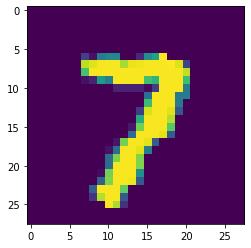

In [15]:
plt.imshow(X[0].cpu().view(28,28))
plt.show()

In [16]:
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(7, device='cuda:0')
